<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5; padding: 15px 5px; " >
<p>Use this notebook to follow along with the lab tutorial.</p>
</div>

# <font color="blue">Lesson 7 - Performance Metrics & Clustering Analysis</font>

## Section 2. Area Under the Curve
### Understand AUC

In [24]:
import numpy as np
from sklearn import metrics

truth = np.array([1, 0, 1, 0, 0, 0])
prediction = np.array( [0.7, 0.5, 0.4, 0.8, 0.2, 0.1])

fpr, tpr, thresholds = metrics.roc_curve(truth, prediction, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("Y=" + ",".join(map(str, truth)) + ", Y_hat=%s, AUC=%.3f"%(",".join(map(str, prediction)), auc))

##prediction = np.array([0.3, 0.4, 0.6, 0.6])
##fpr, tpr, thresholds = metrics.roc_curve(truth, prediction, pos_label=1)
##auc = metrics.auc(fpr, tpr)
##print("Y=" + ",".join(map(str, truth)) + ", Y_hat=%s, AUC=%.2f"%(",".join(map(str, prediction)), auc))


Y=1,0,1,0,0,0, Y_hat=0.7,0.5,0.4,0.8,0.2,0.1, AUC=0.625


In [20]:
fpr


array([0.     , 0.16667, 0.66667, 0.66667, 1.     , 1.     ])

In [21]:
tpr

array([0.  , 0.25, 0.25, 0.75, 0.75, 1.  ])

### Plot ROC Curve

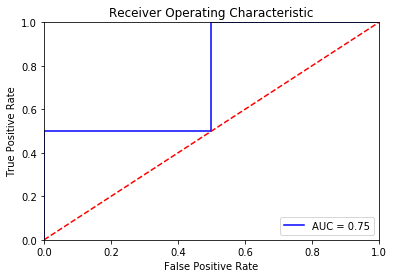

In [5]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Section 3. Dealing with Class Imbalance
### SMOTE: Synthetic Minority Oversampling Technique

#### Alert:
1. Can be slow when data is large
2. Can work on binary or multiclass classification data (different from R)

### Imbalanced Learn Library
See <a href="http://contrib.scikit-learn.org/imbalanced-learn/stable/">Imbalanced-Learn documentation</a>

In [6]:
##Uncomment the following line to install Imbalanced learn
#!pip install --upgrade pip
#!pip install imblearn


In [8]:
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.datasets import make_classification

sample_size = 10000
X, y = make_classification(n_classes=3, class_sep=2, weights=[0.02, 0.1, 0.88], n_informative=3, \
                           n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=sample_size, random_state=10)
print('Original dataset shape {}'.format(Counter(y)))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({2: 8800, 1: 1000, 0: 200})
Resampled dataset shape Counter({2: 8800, 1: 8800, 0: 8800})


## Section 4. Clustering Analysis

### Hierarchical Clustering

(50, 2)


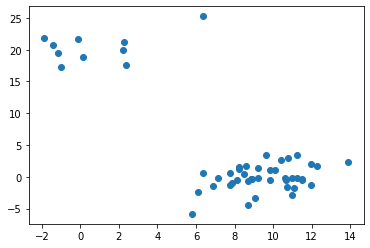

In [14]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[40,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[10,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [15]:
# generate the linkage matrix
Z = linkage(X, 'ward', metric='euclidean') #'ward' can be replaced with 'single', 'complete', 'average', 
                                           # metric can be 'minkowski', 'cosine', 'mahalanobis', etc.

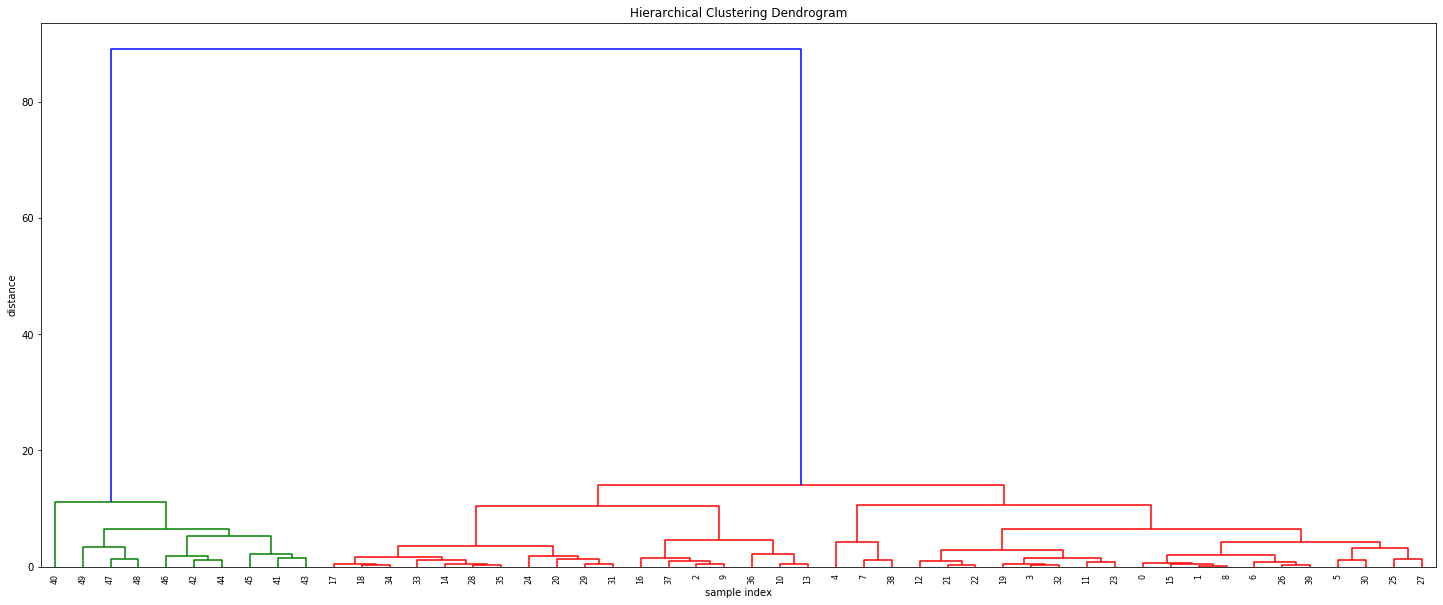

In [16]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

## Section 5.  K-Means

In [17]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)

kmeans.predict([[0, 0], [4, 4]])

kmeans.cluster_centers_


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0]


array([[ 0.77149, 20.40228],
       [ 9.53437, -0.09053]])

<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5; padding: 15px 5px; " >
<p>For additional practice, please see the Workshop notebooks.</p>
</div>